### Import helper functions

In [2]:
from plot_helpers import show_image, plot_results, scatter
from dataset_helpers import dataset_split, filenames_to_labels
from dataset_helpers import sliding_window, images_to_dataset, read_folder_filenames
from dataset_helpers import reshape, center_crop, normalise, preprocess, get_label

import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

imw = 192
imh = 192
c = 1
RS = 2211

### Read dataset

In [5]:
dataset, filenames = images_to_dataset(w=imw, h=imh, process=False)

All files formatted into dataset.


In [3]:
npzfile = np.load('/Volumes/TARDIS/dmso_unmodified.npz')

In [4]:
x_dmso = npzfile["x"]
y_dmso = npzfile["y"]

## Evaluation function

In [88]:
def clip(x):
    mean = np.mean(x)
    return np.clip(x, mean-126, mean+127)

In [55]:
def minmax(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [118]:
def evaluate_pixels(sample):
    under = np.clip(sample, 0, 255)
    over = np.clip(sample, 255, 65535)
    
    plt.figure()
    plt.hist(under.ravel(), bins=50)
    plt.title("Histogram of values <=255")
    
    plt.figure()
    show_image(under, "Image of <=255 values")
    
    # @QUESTION: is this the image we always want to keep?
    plt.figure()
    plt.hist(over.ravel(), bins=50)
    plt.title("Histogram of values >255")
    
    plt.figure()
    show_image(over, "Image of >255 values")    

## Image with more over 255 values

In [119]:
i = 11

In [120]:
sample = x_dmso[i]

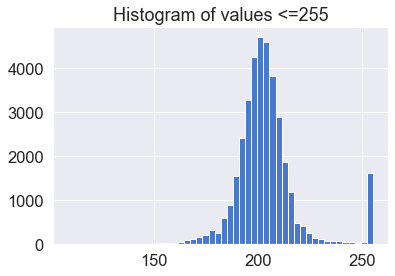

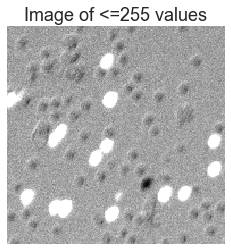

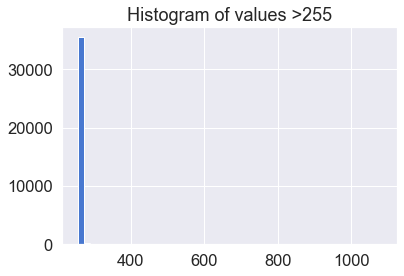

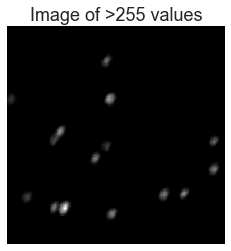

In [121]:
evaluate_pixels(sample)

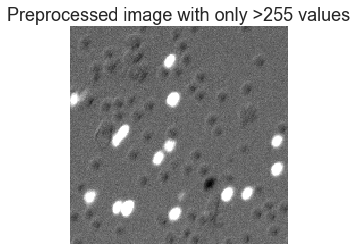

In [122]:
show_image(preprocess(sample), title="Preprocessed image with only >255 values")

## Image with with both under and over values

In [64]:
i = 0

In [65]:
sample = x_dmso[i]

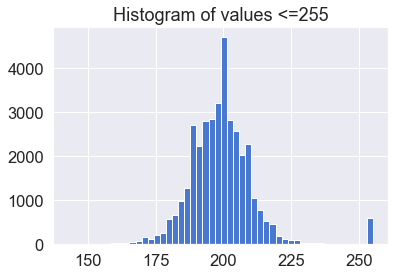

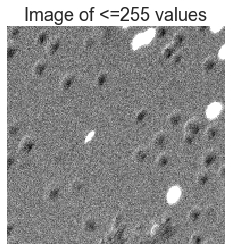

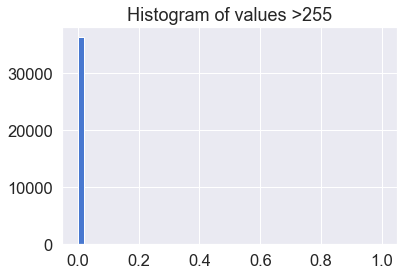

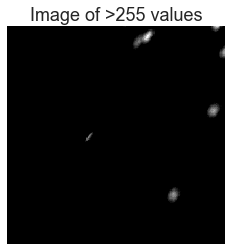

In [66]:
evaluate_pixels(sample)

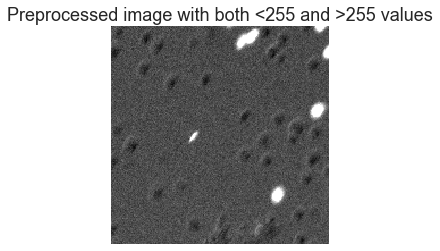

In [67]:
show_image(preprocess(sample), title="Preprocessed image with both <255 and >255 values")